## Objective: 

The goal of this model is to predict the cost of Medical Insurance. The model is trained and tested using Linear Regression Algorithm, which is a regression type model.

## Importing Dependencies 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Read and Load the Dataset

In [4]:
insurance_data = pd.read_csv('./insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_data.shape

(1338, 7)

In [6]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Categorical Features

* Sex
* Smoker
* Region

## Data Analysis

In [8]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


E:\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


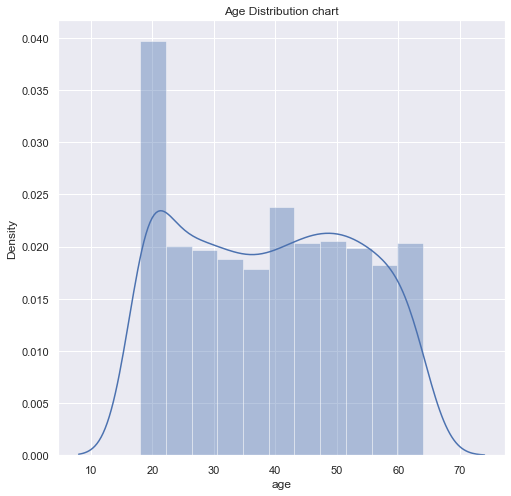

In [10]:
# distribution of age value

sns.set()
plt.figure(figsize=(8,8))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution chart')
plt.show()

E:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


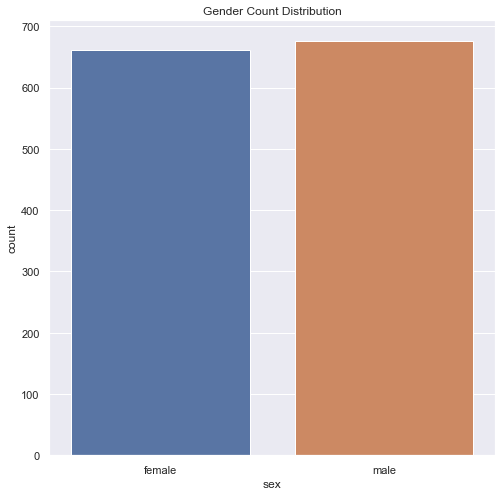

In [11]:
#  Gender column count

sns.set()
plt.figure(figsize=(8,8))
sns.countplot(insurance_data['sex'])
plt.title('Gender Count Distribution')
plt.show()

In [15]:
#almost both the gender are equal
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

E:\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


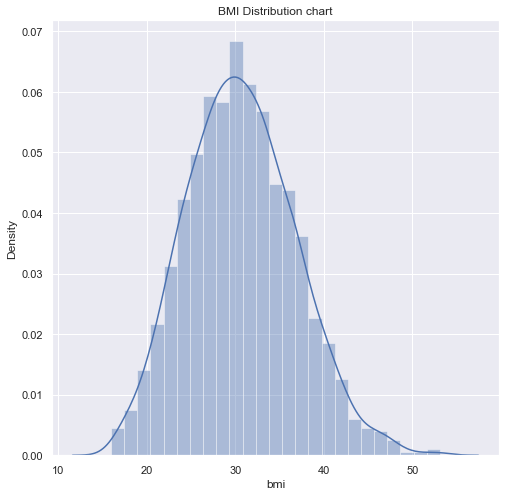

In [16]:
# distribution of Bmi value

sns.set()
plt.figure(figsize=(8,8))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution chart')
plt.show()

The Normal BMI range between 18.5 to 24.9 for average adult

* weight of person < 18.5 -  underweight
* weight of person > 24.9 -  overweight

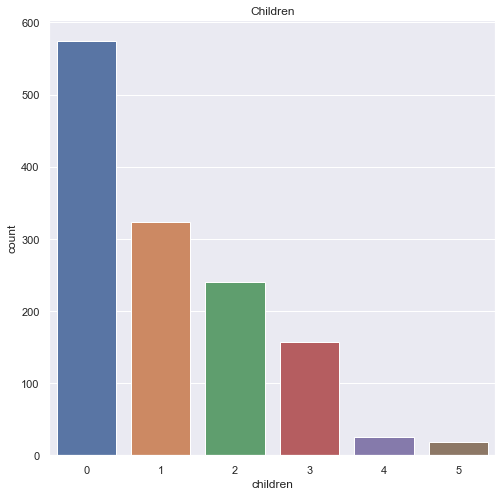

In [18]:
# children column
plt.figure(figsize=(8,8))
sns.countplot(x='children', data=insurance_data)
plt.title('Children')
plt.show()

In [19]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

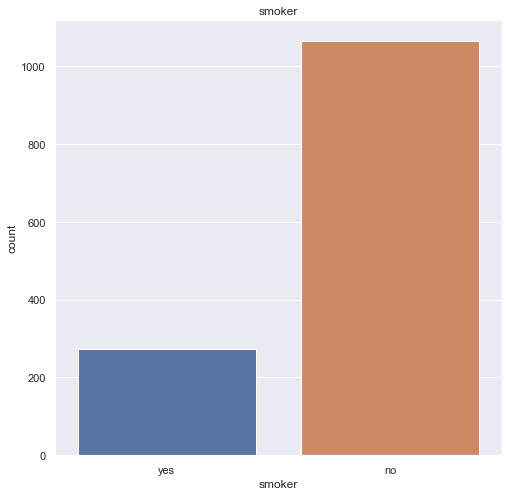

In [20]:
# smoker column
plt.figure(figsize=(8,8))
sns.countplot(x='smoker', data=insurance_data)
plt.title('smoker')
plt.show()

In [21]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

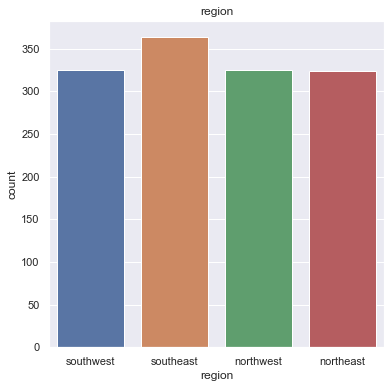

In [22]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_data)
plt.title('region')
plt.show()

In [23]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

E:\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


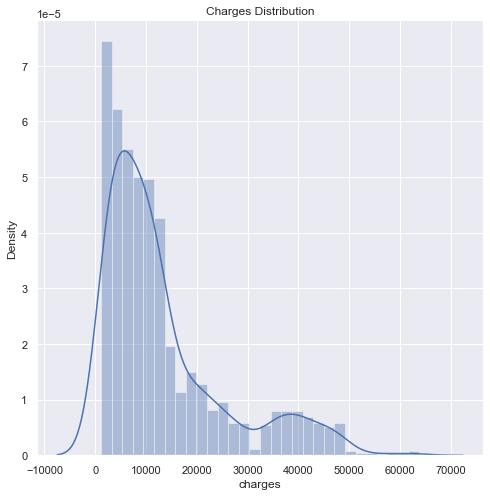

In [24]:
# distribution of charges value
plt.figure(figsize=(8,8))
sns.distplot(insurance_data['charges'])
plt.title('Charges Distribution')
plt.show()

## Data Preprocessing

In [25]:
# Encoding the categorical features

insurance_data.replace({'sex':{'male':0,'female':1}},inplace = True)

insurance_data.replace({'smoker':{'yes':1,'no':0}},inplace = True)

insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [26]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


## Data Splitting

In [27]:
X =insurance_data.drop(columns='charges',axis=1)
y = insurance_data['charges']

X.shape,y.shape

((1338, 6), (1338,))

## Splitting the data for training and testing

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

## Model Training

In [35]:
regressor = LinearRegression()

In [36]:
regressor.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

In [37]:
#prediction on training data
train_prediction = regressor.predict(X_train)

In [38]:
#r2 squared error
train_prediction_score = metrics.r2_score(y_train,train_prediction)

In [39]:
train_prediction_score

0.7528965344026

In [40]:
# prediction on test data
test_prediction = regressor.predict(X_test)

In [41]:
test_prediction_score = metrics.r2_score(y_test,test_prediction)

In [42]:
test_prediction_score

0.7398369165415871

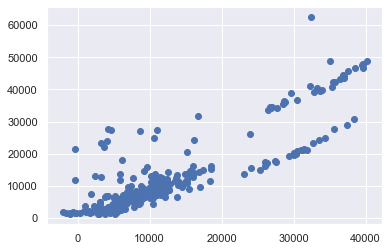

In [44]:
plt.scatter(test_prediction,y_test)

## BUILDING A PREDICTIVE SYSTEM

In [43]:
input_data = (33,1,22.7,0,0,3)

# changing input_data to a numpy array
input_array = np.asarray(input_data)

# reshape the array
data_reshaped = input_array.reshape(1,-1)

prediction = regressor.predict(data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3909.42465676]
The insurance cost is USD  3909.424656762596
